In [1]:
#pip install geopandas
#pip install --upgrade pip

In [30]:
import pandas as pd
import numpy as np
#what statsmodels do I need for the below.
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from numpy.random import randint
from matplotlib.patheffects import withStroke
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
##heat map idea

#Summarize each by state and year (just doing 2019)
#combined states data by quality and net generation
#put that on a heatmap

In [4]:
d1 = pd.read_excel('cooling_data_2019.xlsx',header=2)

C:\Users\chrss\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [5]:
#d1.columns
#d1

In [6]:
d1['uniquekey1'] = [str(d1.loc[x][1]) + str(d1.loc[x][2]) + str(d1.loc[x][3]) + str(d1.loc[x][9])
                    for x in range(len(d1.index))]
#d1['uniquekey1']

In [7]:
#d2 = d1.fillna(0)
d1['Net Generation from Steam Turbines (MWh)'] = [x if int((str(x).strip()+'0')) > 0 else 0 
                                                  for x in d1['Net Generation from Steam Turbines (MWh)']]
d1['Net Generation Associated with Single Shaft Combined Cycle Units (MWh)'] = [x if int((str(x).strip()+'0')) > 0 else 0 
                                                  for x in d1['Net Generation Associated with Single Shaft Combined Cycle Units (MWh)']]
d1['Net Generation Associated with Combined Cycle Gas Turbines (MWh)'] = [x if int((str(x).strip()+'0')) > 0 else 0 
                                                  for x in d1['Net Generation Associated with Combined Cycle Gas Turbines (MWh)']]

d1['Total Generation'] = d1['Net Generation from Steam Turbines (MWh)'] + d1['Net Generation Associated with Single Shaft Combined Cycle Units (MWh)'] + d1['Net Generation Associated with Combined Cycle Gas Turbines (MWh)']
#pd.to_numeric(d2['Net Generation from Steam Turbines (MWh)'])
#d1['Net Generation from Steam Turbines (MWh)']

dgroup = d1.drop_duplicates(subset = 'uniquekey1')
x = dgroup.groupby(['State','Generator Primary Technology'])['Generator Primary Technology'].count().sort_values().groupby(level=0).tail(1)
x = pd.DataFrame(x)
x.rename(columns={'Generator Primary Technology': 'Generator Count'}, inplace=True)
x.reset_index(inplace=True)
#x

x2 =  d1.groupby(['State','Generator Primary Technology'])['Total Generation'].sum().sort_values().groupby(level=0).tail(1)
x2 = pd.DataFrame(x2)
x2.reset_index(inplace=True)



In [8]:
##map these with geopandas

#1 - create a map of the highest quantity generators at plants by state
x

,State,Generator Primary Technology,Generator Count
0,SD,Conventional Steam Coal,1
1,ME,Wood/Wood Waste Biomass,2
2,HI,Petroleum Liquids,2
3,ID,Natural Gas Fired Combined Cycle,2
4,DE,Natural Gas Fired Combined Cycle,2
5,MT,Conventional Steam Coal,2
6,NH,Natural Gas Fired Combined Cycle,2
7,RI,Natural Gas Fired Combined Cycle,3
8,TN,Conventional Steam Coal,4
9,NM,Natural Gas Steam Turbine,4


In [9]:
##map these with geopandas

#2 - create a map of the highest net generation volume by plant type by state
x2

,State,Generator Primary Technology,Total Generation
0,ME,Natural Gas Fired Combined Cycle,1231031
1,SD,Conventional Steam Coal,2619088
2,DE,Natural Gas Fired Combined Cycle,3197506
3,ID,Natural Gas Fired Combined Cycle,3303015
4,HI,Petroleum Liquids,3325338
5,RI,Natural Gas Fired Combined Cycle,5703762
6,NH,Nuclear,10906923
7,MA,Natural Gas Fired Combined Cycle,12410347
8,WA,Natural Gas Fired Combined Cycle,12698357
9,MT,Conventional Steam Coal,13544858


In [10]:
## Displaying Feature Investigation by Type using KNN

#calculate some key features such as Power Output / Capacity & Water Cooling data
#group on a KNN graph by type
#find the best looking KNN graph by type to find key features for...


In [11]:
#taking this list from the random forest by Brendan
keyfeatureslist = ['Generator Primary Technology',
       'Net Generation from Steam Turbines (MWh)',
       'Net Generation Associated with Single Shaft Combined Cycle Units (MWh)',
       'Net Generation Associated with Combined Cycle Gas Turbines (MWh)',
       'Summer Capacity of Steam Turbines (MW)',
       'Summer Capacity Associated with Single Shaft Combined Cycle Units (MW)',
       'Summer Capacity Associated with Combined Cycle Gas Turbines (MW)',
       'Fuel Consumption from All Fuel Types (MMBTU)',
       'Fuel Consumption from Steam Turbines (MMBTU)',
       'Fuel Consumption from Single Shaft Combined Cycle Units (MMBTU)',
       'Fuel Consumption from Combined Cycle Gas Turbines (MMBTU)',
       'Coal Consumption (MMBTU)', 'Natural Gas Consumption (MMBTU)',
       'Petroleum Consumption (MMBTU)', 'Biomass Consumption (MMBTU)',
       'Water Withdrawal Volume (Million Gallons)',
       'Water Consumption Volume (Million Gallons)',
       'Water Withdrawal Intensity Rate (Gallons / MWh)',
       'Water Consumption Intensity Rate (Gallons / MWh)',
       'Cooling Unit Hours in Service',
       'Average Distance of Water Intake Below Water Surface (Feet)','uniquekey1']

#keyfeatureslist[1:]

In [12]:
#narrowing the apples/oranges list:
keygeneratorslist = ['Conventional Steam Coal', 'Natural Gas Fired Combined Cycle',
                     'Natural Gas Steam Turbine','Petroleum Liquids', 'Nuclear', 
                     'Wood/Wood Waste Biomass']
d2 = d1[d1['Generator Primary Technology'].isin(keygeneratorslist)]
d2 = d2[keyfeatureslist[:-1]]

for column in keyfeatureslist[:-1]:
    if column != keyfeatureslist[0]:
        d2[column] = [float((str(x).strip()+'0')) if float((str(x).strip()+'0')) > 0 else 0 for x in d2[column]]
    else:
        continue
d2

,Generator Primary Technology,Net Generation from Steam Turbines (MWh),Net Generation Associated with Single Shaft Combined Cycle Units (MWh),Net Generation Associated with Combined Cycle Gas Turbines (MWh),Summer Capacity of Steam Turbines (MW),Summer Capacity Associated with Single Shaft Combined Cycle Units (MW),Summer Capacity Associated with Combined Cycle Gas Turbines (MW),Fuel Consumption from All Fuel Types (MMBTU),Fuel Consumption from Steam Turbines (MMBTU),Fuel Consumption from Single Shaft Combined Cycle Units (MMBTU),...,Coal Consumption (MMBTU),Natural Gas Consumption (MMBTU),Petroleum Consumption (MMBTU),Biomass Consumption (MMBTU),Water Withdrawal Volume (Million Gallons),Water Consumption Volume (Million Gallons),Water Withdrawal Intensity Rate (Gallons / MWh),Water Consumption Intensity Rate (Gallons / MWh),Cooling Unit Hours in Service,Average Distance of Water Intake Below Water Surface (Feet)
0,Natural Gas Steam Turbine,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2715.910,0.000,0.0,0.0,7390.0,100.0
1,Natural Gas Steam Turbine,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1326.360,0.000,0.0,0.0,3750.0,100.0
2,Natural Gas Steam Turbine,39160.0,0.0,0.0,1600.0,0.0,0.0,704780.0,704780.0,0.0,...,0.0,704780.0,0.0,0.0,1536.050,0.000,3922500.0,0.0,1870.0,100.0
3,Natural Gas Steam Turbine,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2469.600,0.000,0.0,0.0,7200.0,100.0
4,Natural Gas Steam Turbine,120870.0,0.0,0.0,1600.0,0.0,0.0,2023100.0,2023100.0,0.0,...,0.0,2023100.0,0.0,0.0,3461.460,0.000,2863790.0,0.0,3250.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14698,Natural Gas Fired Combined Cycle,0.0,3553830.0,0.0,0.0,4850.0,0.0,22346040.0,0.0,22346040.0,...,0.0,22346040.0,0.0,0.0,73.031,60.755,0.0,0.0,7440.0,0.0
14699,Natural Gas Fired Combined Cycle,0.0,3281280.0,0.0,0.0,4850.0,0.0,20729350.0,0.0,20729350.0,...,0.0,20729350.0,0.0,0.0,67.262,54.864,0.0,0.0,7200.0,0.0
14700,Natural Gas Fired Combined Cycle,0.0,2017930.0,0.0,0.0,4850.0,0.0,12827540.0,0.0,12827540.0,...,0.0,12827540.0,0.0,0.0,45.310,35.132,0.0,0.0,4950.0,0.0
14701,Natural Gas Fired Combined Cycle,0.0,3128700.0,0.0,0.0,4850.0,0.0,19955000.0,0.0,19955000.0,...,0.0,19955000.0,0.0,0.0,57.326,45.792,0.0,0.0,7000.0,0.0


In [14]:
X = d2[keyfeatureslist[1:-1]]
y = d2["Generator Primary Technology"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
knn.score(X_test,y_test)

0.9641556986838421

In [16]:
#checking other scores
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
scores

[0.9675161019322319,
 0.9624754970596472,
 0.9677961355362643,
 0.965835900308037,
 0.9641556986838421,
 0.9610753290394848,
 0.9585550266031924,
 0.9588350602072249,
 0.9563147577709326,
 0.956594791374965,
 0.9515541865023803,
 0.9507140856902828,
 0.9490338840660879,
 0.9493139176701204,
 0.9467936152338281,
 0.9434332119854383,
 0.9423130775693083,
 0.9414729767572109,
 0.9414729767572109]

In [22]:
d3 = d1[d1['Generator Primary Technology'].isin(keygeneratorslist)]
d3 = d3[keyfeatureslist]

for column in keyfeatureslist[:-1]:
    if column != keyfeatureslist[0]:
        d3[column] = [float((str(x).strip()+'0')) if float((str(x).strip()+'0')) > 0 else 0 for x in d2[column]]
    else:
        continue


x3 = d3.groupby(['uniquekey1','Generator Primary Technology'])[keyfeatureslist[1:-1]].mean()
x3.reset_index(inplace=True)
x3.drop('uniquekey1',axis=1,inplace=True)
x3

,Generator Primary Technology,Net Generation from Steam Turbines (MWh),Net Generation Associated with Single Shaft Combined Cycle Units (MWh),Net Generation Associated with Combined Cycle Gas Turbines (MWh),Summer Capacity of Steam Turbines (MW),Summer Capacity Associated with Single Shaft Combined Cycle Units (MW),Summer Capacity Associated with Combined Cycle Gas Turbines (MW),Fuel Consumption from All Fuel Types (MMBTU),Fuel Consumption from Steam Turbines (MMBTU),Fuel Consumption from Single Shaft Combined Cycle Units (MMBTU),...,Coal Consumption (MMBTU),Natural Gas Consumption (MMBTU),Petroleum Consumption (MMBTU),Biomass Consumption (MMBTU),Water Withdrawal Volume (Million Gallons),Water Consumption Volume (Million Gallons),Water Withdrawal Intensity Rate (Gallons / MWh),Water Consumption Intensity Rate (Gallons / MWh),Cooling Unit Hours in Service,Average Distance of Water Intake Below Water Surface (Feet)
0,Natural Gas Steam Turbine,1.436899e+06,0.0,0.00,516.100000,0.0,0.0,1.514793e+07,1.514793e+07,0.0,...,0.000000e+00,1.514793e+07,0.000000,0.0,10597.455833,0.000000,876067.500000,0.000000,7299.166667,50.0
1,Conventional Steam Coal,2.549746e+06,0.0,0.00,8320.000000,0.0,0.0,2.581527e+07,2.581527e+07,0.0,...,2.409550e+07,1.719772e+06,0.000000,0.0,4374.166667,2551.666667,21919.166667,9861.666667,4038.333333,160.0
2,Natural Gas Steam Turbine,2.194411e+06,0.0,0.00,10200.000000,0.0,0.0,2.381257e+07,2.381257e+07,0.0,...,0.000000e+00,2.381257e+07,0.000000,0.0,148060.833333,0.000000,774692.500000,0.000000,0.000000,0.0
3,Conventional Steam Coal,3.584435e+06,0.0,0.00,1118.500000,0.0,0.0,3.536225e+07,3.536225e+07,0.0,...,3.460144e+07,7.608042e+05,0.000000,0.0,15781.919417,120.013333,443065.000000,3227.500000,7250.000000,100.0
4,Natural Gas Fired Combined Cycle,1.177036e+06,0.0,2210996.25,2000.000000,0.0,3540.0,2.379409e+07,6.248500e+05,0.0,...,0.000000e+00,2.379409e+07,0.000000,0.0,0.000000,63.078583,0.000000,10363.333333,7090.000000,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Conventional Steam Coal,6.352783e+05,0.0,0.00,1000.000000,0.0,0.0,7.281232e+06,7.281232e+06,0.0,...,7.269670e+06,1.156000e+04,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6338.333333,0.0
839,Conventional Steam Coal,2.137957e+06,0.0,0.00,3900.000000,0.0,0.0,2.231478e+07,2.231478e+07,0.0,...,2.228323e+07,0.000000e+00,31550.833333,0.0,0.000000,0.000000,0.000000,0.000000,5746.666667,0.0
840,Conventional Steam Coal,1.542392e+06,0.0,0.00,3320.000000,0.0,0.0,1.993226e+07,1.993226e+07,0.0,...,1.990445e+07,0.000000e+00,27812.500000,0.0,0.000000,0.000000,0.000000,0.000000,6405.000000,0.0
841,Conventional Steam Coal,2.508926e+06,0.0,0.00,5666.666667,0.0,0.0,2.565042e+07,2.565042e+07,0.0,...,2.559195e+07,0.000000e+00,58472.500000,0.0,106.407500,106.407500,3522.777778,3522.777778,5496.944444,540.0


In [28]:
X = x3[keyfeatureslist[1:-1]]
y = x3["Generator Primary Technology"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#k = 5
#knn = KNeighborsClassifier(n_neighbors=k)
#knn.fit(X_train,y_train)

In [29]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
scores

[0.9478672985781991,
 0.9478672985781991,
 0.95260663507109,
 0.9478672985781991,
 0.943127962085308,
 0.943127962085308,
 0.95260663507109,
 0.95260663507109,
 0.9383886255924171,
 0.9478672985781991,
 0.943127962085308,
 0.943127962085308,
 0.9383886255924171,
 0.933649289099526,
 0.9289099526066351,
 0.933649289099526,
 0.9289099526066351,
 0.933649289099526,
 0.933649289099526]

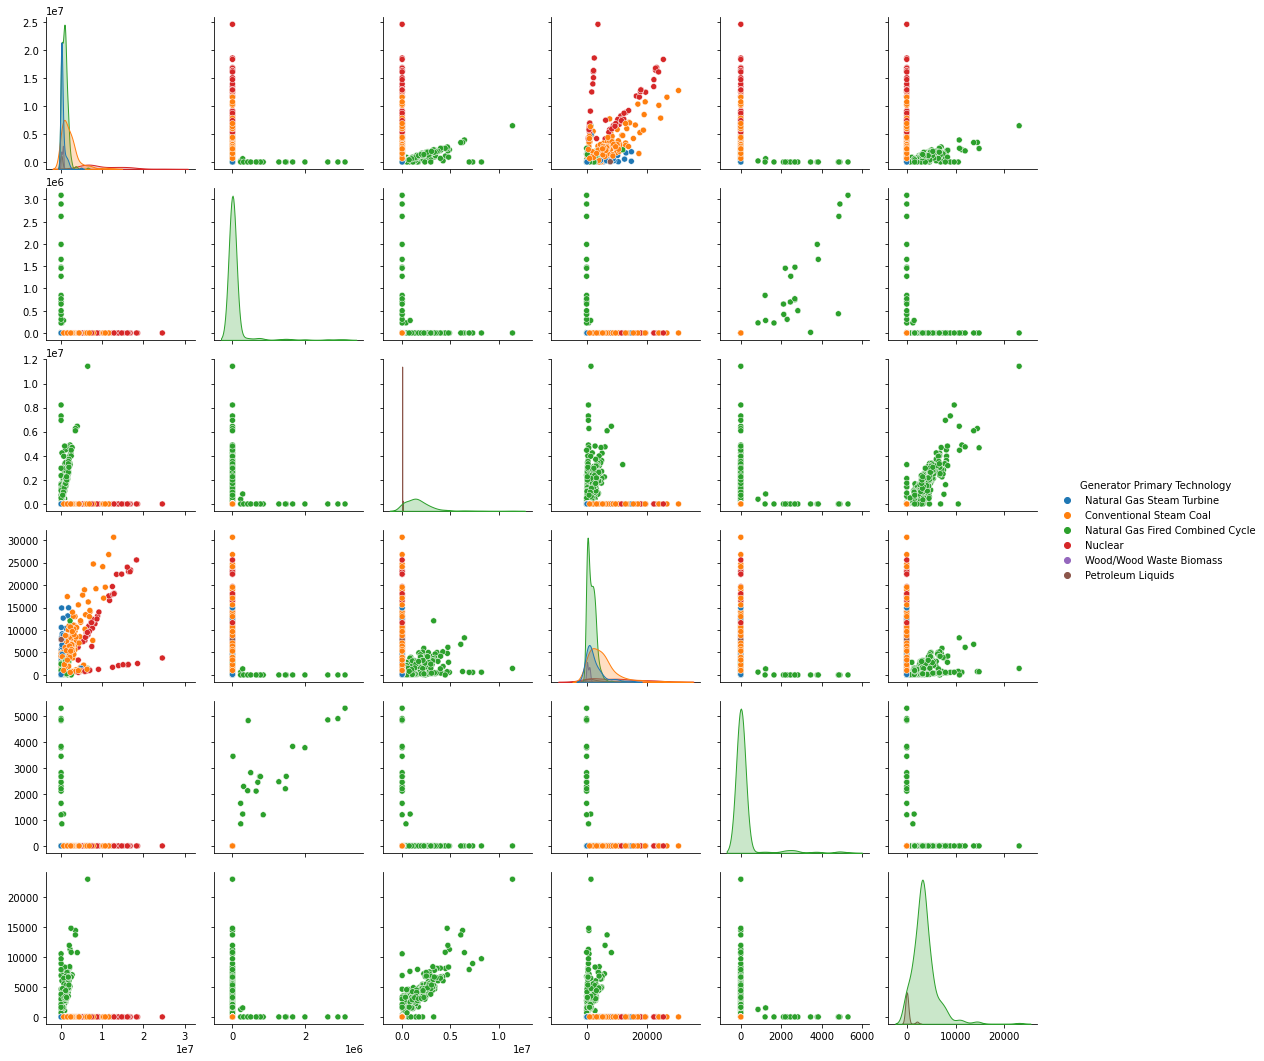

In [40]:
#graphing net generation and summer capacity
x4 = x3[['Generator Primary Technology',
       'Net Generation from Steam Turbines (MWh)',
       'Net Generation Associated with Single Shaft Combined Cycle Units (MWh)',
       'Net Generation Associated with Combined Cycle Gas Turbines (MWh)',
       'Summer Capacity of Steam Turbines (MW)',
       'Summer Capacity Associated with Single Shaft Combined Cycle Units (MW)',
       'Summer Capacity Associated with Combined Cycle Gas Turbines (MW)']]

graph1 = sns.pairplot(x4,hue='Generator Primary Technology')

graph1.set(xlabel = None)
graph1.set(ylabel = None)
plt.show()
#x4

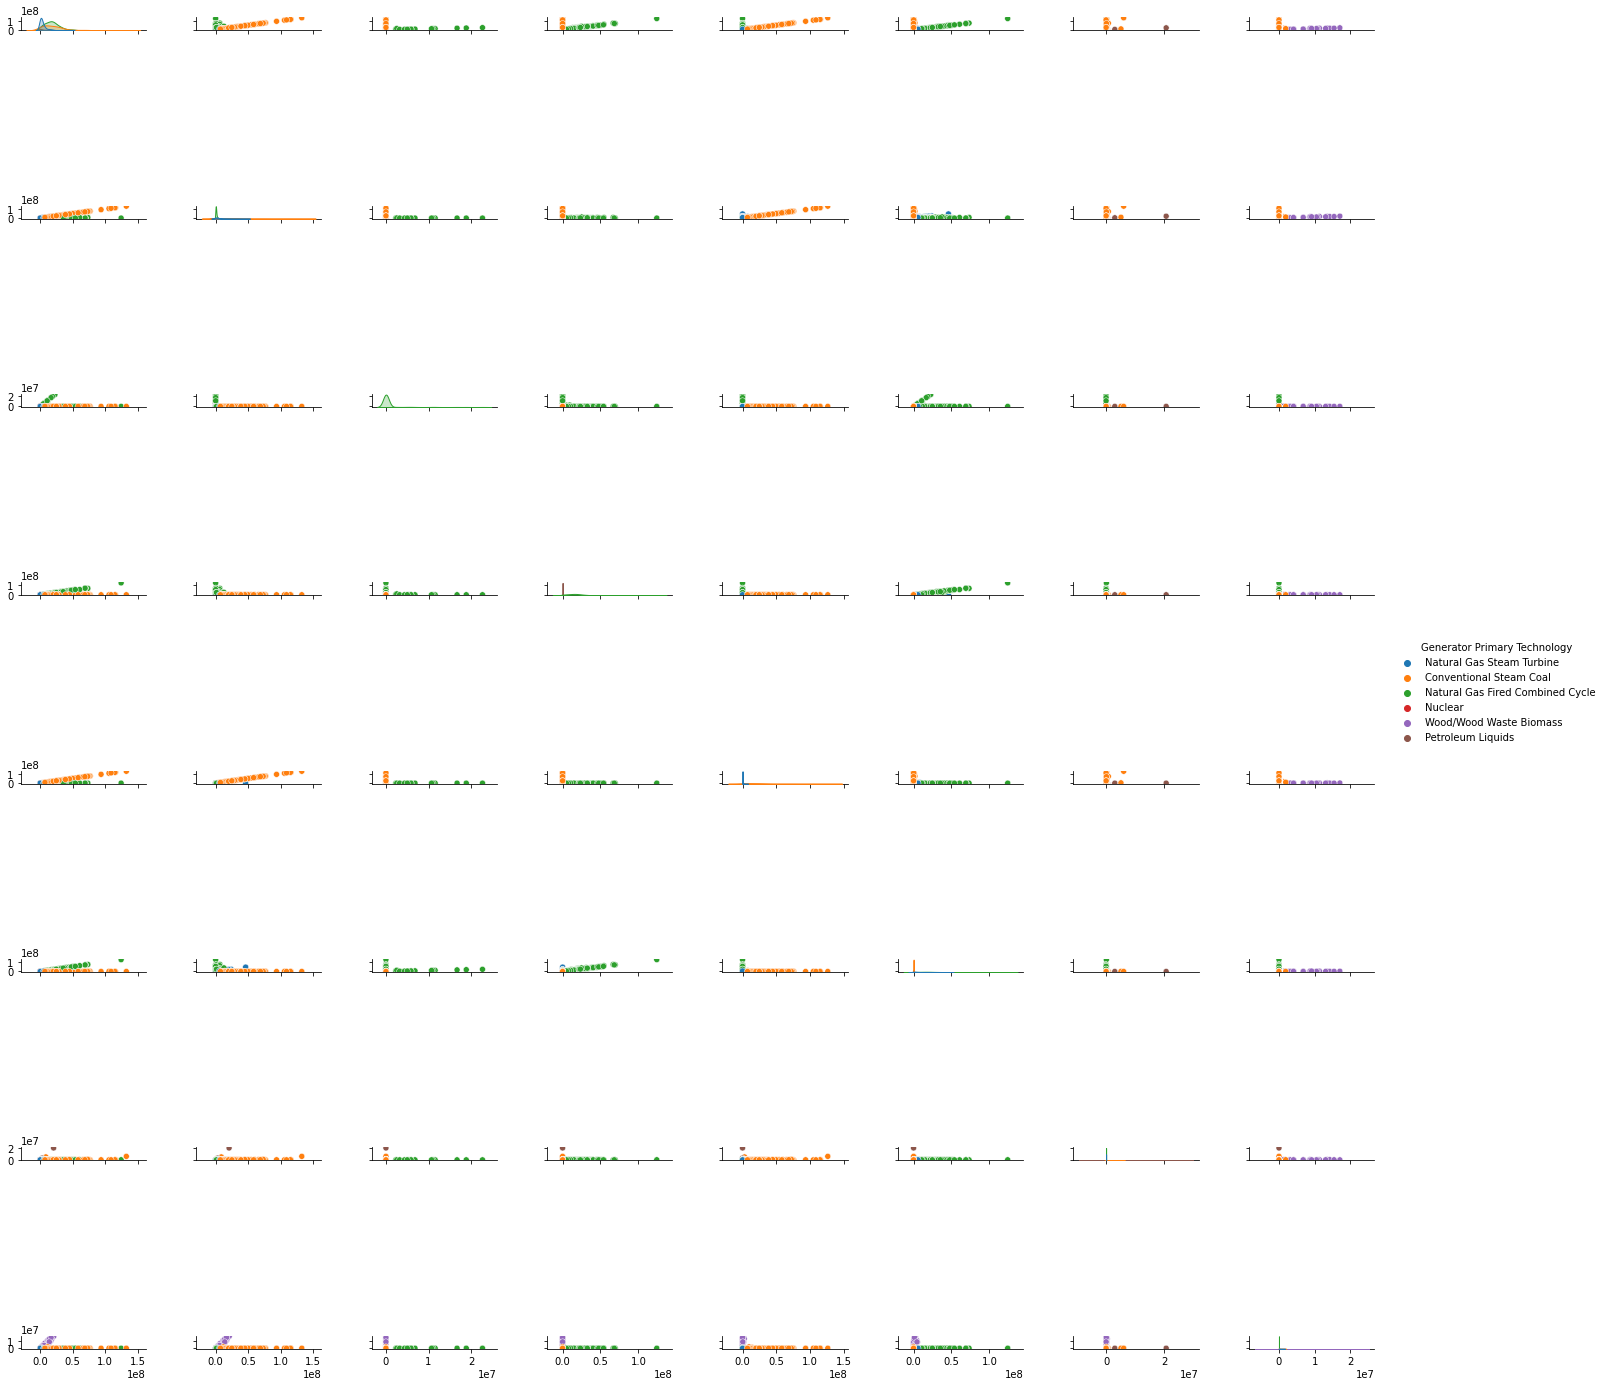

In [42]:
x5 = x3[['Generator Primary Technology',
       'Fuel Consumption from All Fuel Types (MMBTU)',
       'Fuel Consumption from Steam Turbines (MMBTU)',
       'Fuel Consumption from Single Shaft Combined Cycle Units (MMBTU)',
       'Fuel Consumption from Combined Cycle Gas Turbines (MMBTU)',
       'Coal Consumption (MMBTU)', 'Natural Gas Consumption (MMBTU)',
       'Petroleum Consumption (MMBTU)', 'Biomass Consumption (MMBTU)']]

graph2 = sns.pairplot(x5,hue='Generator Primary Technology')

graph2.set(xlabel = None)
graph2.set(ylabel = None)
plt.show()

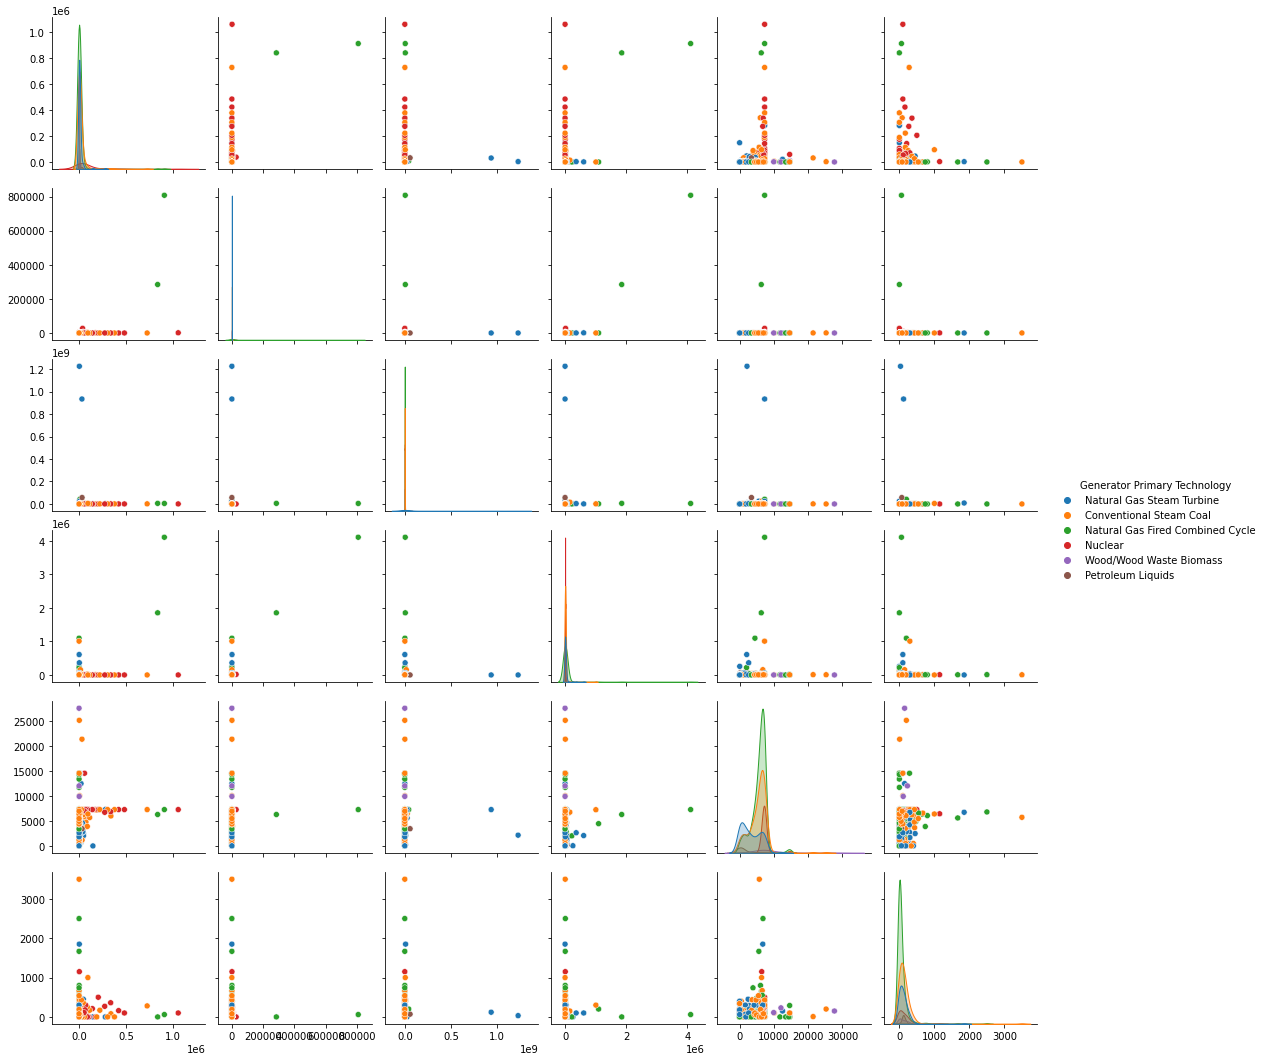

In [43]:
x6 = x3[['Generator Primary Technology',
       'Water Withdrawal Volume (Million Gallons)',
       'Water Consumption Volume (Million Gallons)',
       'Water Withdrawal Intensity Rate (Gallons / MWh)',
       'Water Consumption Intensity Rate (Gallons / MWh)',
       'Cooling Unit Hours in Service',
       'Average Distance of Water Intake Below Water Surface (Feet)']]

graph3 = sns.pairplot(x6,hue='Generator Primary Technology')

graph3.set(xlabel = None)
graph3.set(ylabel = None)
plt.show()

In [ ]:
## Logistic Regression for anomaly detection

#What is an anomaly going to be for __ type of system

In [ ]:

# What are we looking at for unsupervised?